<a href="https://colab.research.google.com/github/superbunny38/DataScience/blob/main/Probability%26Statistics/5Summer_ProbabilityDistribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Binomial Probability Distribution

In [2]:
from scipy.stats import binom
# setting the values
# of n and p
n = 6
p = 0.6
# defining the list of r values
r_values = list(range(n + 1))
# obtaining the mean and variance 
mean, var = binom.stats(n, p)
# list of pmf values
dist = [binom.pmf(r, n, p) for r in r_values ]
# printing the table
print("r\tp(r)")
for i in range(n + 1):
    print(str(r_values[i]) + "\t" + str(dist[i]))
# printing mean and variance
print("mean = "+str(mean))
print("variance = "+str(var))

r	p(r)
0	0.004096000000000002
1	0.03686400000000005
2	0.13824000000000003
3	0.2764800000000001
4	0.31104
5	0.18662400000000007
6	0.04665599999999999
mean = 3.5999999999999996
variance = 1.44


In [8]:
from scipy.stats import binom
# setting the values
# of n and p
n = 10
p = 0.35
# defining the list of r values
r_values = list(range(n + 1))
# obtaining the mean and variance 
mean, var = binom.stats(n, p)
# list of pmf values
dist = [binom.pmf(r, n, p) for r in r_values ]

cumul = [0]
for value in dist:
  cumul.append(cumul[-1]+value)

cumul.pop(0)
# printing the table
print("r\tp(r)")
for i in range(n + 1):
    print(str(r_values[i]) + "\t" + str(dist[i]) + "\t" + str(cumul[i]))

# printing mean and variance
print("mean = "+str(mean))
print("variance = "+str(var))
print("std = "+str(np.sqrt(var)))

r	p(r)
0	0.013462743344628913	0.013462743344628913
1	0.07249169493261728	0.08595443827724619
2	0.175652953105957	0.2616073913832032
3	0.2522196249726563	0.5138270163558596
4	0.2376684927626953	0.7514955091185549
5	0.15357041070820318	0.9050659198267581
6	0.0689097996767578	0.9739757195035159
7	0.02120301528515624	0.9951787347886721
8	0.004281378086425777	0.999460112875098
9	0.0005123016513671869	0.9999724145264651
10	2.7585473535156207e-05	1.0000000000000002
mean = 3.5
variance = 2.275
std = 1.5083103128998356


In [28]:
def p_hist(n,p):
  r_values = list(range(n + 1))
  # obtaining the mean and variance 
  mean, var = binom.stats(n, p)
  # list of pmf values
  dist = [binom.pmf(r, n, p) for r in r_values ]
  n = len(dist)-1
  x = list(range(n+1))
  print("mean:",mean,"variance:",var)
  plt.title(f"Boinomial Histogram, n = {n}, p = {p}")
  plt.ylabel('P( X = x )')
  plt.xlabel('x')
  plt.bar(x,dist,width = 1.,edgecolor='black')
  plt.xticks(np.arange(0,n+1,1))

mean: 1.2 variance: 1.02


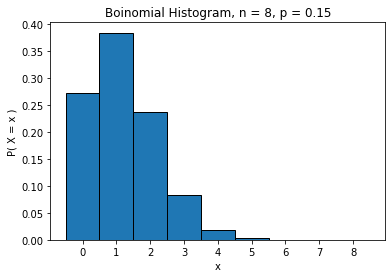

In [29]:
p_hist(8,0.15)

mean: 4.0 variance: 2.0


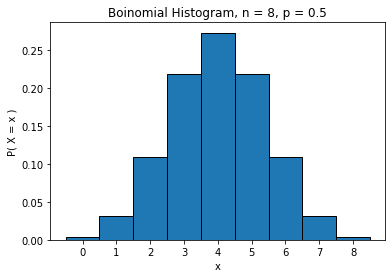

In [30]:
p_hist(8,0.5)

mean: 6.8 variance: 1.02


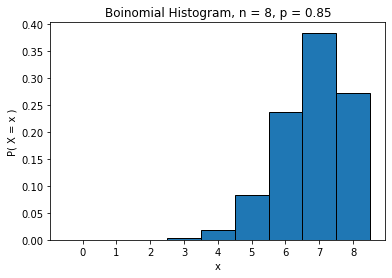

In [31]:
p_hist(8,0.85)

mean: 20.0 variance: 3.999999999999999


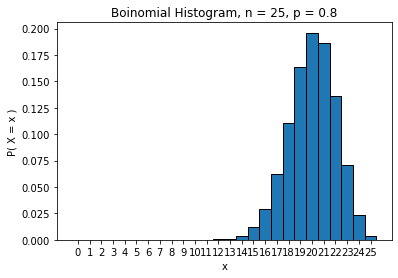

In [32]:
p_hist(25,0.8)

mean: 40.0 variance: 7.999999999999998


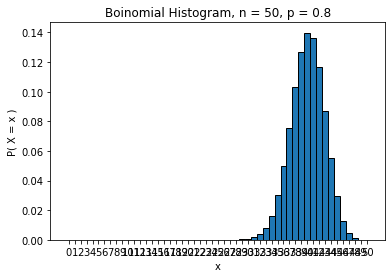

In [33]:
p_hist(50,0.8)

mean: 56.0 variance: 11.199999999999998


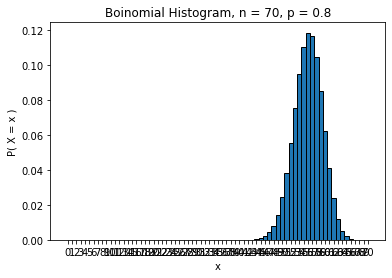

In [35]:
p_hist(70,0.8)

In [36]:
def empirical_binomial(n,p):
  r_values = list(range(n + 1))
  # obtaining the mean and variance 
  mean, var = binom.stats(n, p)
  std = np.sqrt(var)
  print(f"68% of the observations lie between {mean-std} and {mean + std}")
  print(f"95% of the observations lie between {mean-2*std} and {mean + 2*std}")
  print(f"99.7% of the observations lie between {mean-3*std} and {mean + 3*std}")

In [37]:
empirical_binomial(400,0.35)

68% of the observations lie between 130.46060798583053 and 149.53939201416947
95% of the observations lie between 120.92121597166108 and 159.0787840283389
99.7% of the observations lie between 111.38182395749163 and 168.61817604250837


# Poisson Probability Distribution Function

$P(X=x)=P(x)=\frac{(λt)^x}{x!}e^{-λt}$

$\lambda$: average number of occurences of the event in some interval of length =1

$t$: fixed length

In [39]:
import math
def p_poisson(l,t,x):#lambda,t,x
  #lambda * t
  tmp = l*t
  numerator = tmp**x
  denominator = math.factorial(x)
  right = np.exp(-l*t)
  p = numerator*right/denominator
  
  return p


In [54]:
def pmf_poisson(l,t,n = 30):
  dist = []
  x = 0
  n_zeros = 0
  for i in range(n):
    p = p_poisson(l,t,x)
    dist.append(p)
    if p == 0:
      n_zeros += 1
    else:
      n_zeros = 0
    if n_zeros > 3:
      break
    x+= 1
  return dist

In [41]:
def poisson_stat(l,t):
  mean = l*t
  var = l*t
  std = np.sqrt(var)
  print(f"mean: {mean}, std: {std}")
  return mean, var, std

In [42]:
p_poisson(0.6,10,3)

0.08923507835998891

In [43]:
poisson_stat(0.6,5)

mean: 3.0, std: 1.7320508075688772


(3.0, 3.0, 1.7320508075688772)

In [44]:
Number = list(np.arange(0,12,1))

In [45]:
Number

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [46]:
Frequency = [57,203,383,525,532,408,273,139,45,27,10,6]

In [49]:
pd.DataFrame({'Number Detected':Number, 'Frequency':Frequency})

,Number Detected,Frequency
0,0,57
1,1,203
2,2,383
3,3,525
4,4,532
5,5,408
6,6,273
7,7,139
8,8,45
9,9,27


In [51]:
p_poisson(203,7.5,1)

0.0

In [55]:
pmf_poisson(0.2,30)

[0.0024787521766663585,
 0.014872513059998151,
 0.044617539179994455,
 0.08923507835998891,
 0.13385261753998337,
 0.16062314104798003,
 0.16062314104798003,
 0.13767697804112575,
 0.1032577335308443,
 0.06883848902056287,
 0.041303093412337726,
 0.022528960043093304,
 0.011264480021546652,
 0.0051989907791753776,
 0.0022281389053608763,
 0.0008912555621443505,
 0.0003342208358041314,
 0.00011796029498969344,
 3.9320098329897816e-05,
 1.2416873156809836e-05,
 3.7250619470429508e-06,
 1.064303413440843e-06,
 2.902645673020481e-07,
 7.57211914700995e-08,
 1.8930297867524878e-08,
 4.5432714882059706e-09,
 1.04844726650907e-09,
 2.3298828144646e-10,
 4.992606030995572e-11,
 1.0329529719301183e-11]

# Hypergeometric Probabilty Distribution

In [7]:
import math

def nCr(n,r):
    f = math.factorial
    return f(n) / f(r) / f(n-r)

In [11]:
def p_hyper(N,n,k,x):
  numerator = nCr(k,x)*nCr(N-k,n-x)
  denominator = nCr(N,n)
  p = numerator/denominator
  return p

In [12]:
p_hyper(30,4,18,3)

0.3573070607553367

In [15]:
def hyper_stat(N,n,k):
  mean = n*k/N
  var = (N-n)/(N-1)*mean*(N-k)/N
  std = np.sqrt(var)
  print(f"mean: {mean}, var: {var}, std: {std}")
  return mean,var

In [16]:
hyper_stat(30,4,18)

mean: 2.4, var: 0.8606896551724137, std: 0.927733612182082


(2.4, 0.8606896551724137)

In [17]:
def pmf_hyper(N,n,k):
  dist = []
  for i in range(n+1):
    p = p_hyper(N,n,k,i)
    dist.append(p)
  return dist

In [18]:
pmf_hyper(30,4,18)

[0.018062397372742203,
 0.14449917898193762,
 0.3684729064039409,
 0.3573070607553367,
 0.11165845648604271]